<a href="https://colab.research.google.com/github/kemusiro/freertos-pic18f452/blob/main/gakuen202205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 素因数分解をプログラミングする
## 素数
### 素数の定義と素数の分布
素数とは、2以上の自然数で、1と自分自身しか約数を持たないもののこと。
1より大きく、素数ではない自然数を合成数と呼ぶ。
素数は無限にある。現在でも素数を生成する式は見つかっていません。しかし素数を平面上に一定の規則に従って並べると、何か意味のある構造が見えることがある。ウラムの螺旋というものがある。
しかしこのように並ぶ数学的に厳密な説明はまだ不明です。

### 素数の生成
エラトステネスのふるい

### 素数の判定
試し割り法

## 素因数分解
任意の自然数を素数の積で表すことを素因数分解と呼ぶ。素因数分解は一通りしか無いことが証明されている。

## 暗号化
他人に読み取れない形に入力を変換すること。
暗号化されたメッセージから元のメッセージを復元することを復号化と呼ぶ。

## 共通鍵と公開鍵


## 通信の暗号化とデジタル署名
## アリス、ボブ、キャロル
## 暗号体験
  * テキストメッセージの暗号化と復号化
  * 相手に渡す画像のスクランブル化


# 復号化できることの証明
m^(k1 k2) ≡m(modn) を証明すればよい。
https://manabitimes.jp/math/1146

## コラム: 素因数分解の応用分野
* SSL通信(https)における共通鍵の暗号化
* ビットコイン(署名) https://gaiax-blockchain.com/key
* マイナンバーカードによる電子文書の電子署名
  * 署名用電子証明書
  * 利用者証明用電子証明書
* IC運転免許証 https://www.pref.aichi.jp/police/menkyo/qa/menkyo/ic.html
  * RSA暗号が使われている。
* 電子書籍の保護(DRM) https://www.jepa.or.jp/ebookpedia/201510_2621
* ICチップ付きのクレジットカード https://www.bcm.co.jp/site/security/security2-3.pdf



In [ ]:
def encode(m):
    return m
def decode(m):
    return m

message = 'hello'
e = encode(message)
d = decode(e)
print(message, '->', e, '->', d)


hello -> hello -> hello


# 素数とは

## エラトステネスのふるいのデモ


Google Colabでのアニメーションについては、以下のページを参照にした。
https://dreamer-uma.com/python-animation/

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

n = 30
figsize=(6.4, 6.4)

fig, ax = plt.subplots(figsize=figsize)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax.axis("off")
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

ims = []
for i in range(n * n):
    ax.text(i % n, i // n, i + 1, color='green', ha='center')

p = np.ones((n * n + 1)) # 0からn*n
p[0:2] = 0
im = ax.imshow(p[1:].reshape([n, n]), animated=True)
ims.append([im])
for i in range(2, int(n + 1)):
    if p[i]:
        p[i*i::i] = 0
        im = ax.imshow(p[1:].reshape([n, n]), animated=True)
        ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True, repeat_delay=1000)
rc('animation', html='jshtml')
plt.close()
ani

# 素数関連のプログラム

In [ ]:
import numpy as np

def sieve(n: int) -> np.ndarray:
    ''' nまでの素数を求める。
    '''
    # 2以上の数を素数としてマークする。
    p = np.array([False, False] + [True] * (n - 1))
    for i in range(2, int(np.sqrt(n)+1)):
        if p[i]:
            # iが素数ならi^2, i^2+i, i^2+2i...は素数ではない
            p[i*i::i] = False
    return np.where(p==True)[0]

def is_prime(n: int) -> bool:
    ''' nが素数か判定する。
    '''
    if n <= 1:
        return False
    for i in range(2, int(np.sqrt(n)+1)):
        if n % i == 0:
            return False
    return True
    
print(sieve(1000))
print(is_prime(997))

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 967 971 977 983 991 997]
True


# ウラムの螺旋を描画する。

6297 62753


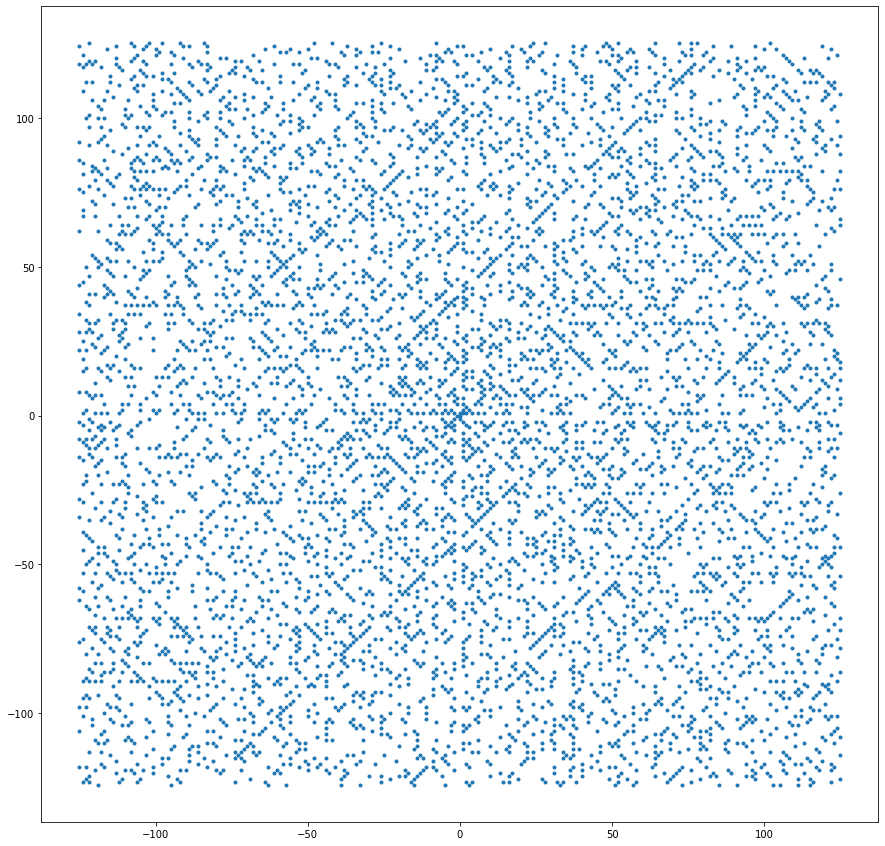

In [ ]:
import matplotlib.pyplot as plt

# 正方形の螺旋
rotate = 90
walk = [n // 2 + 1 for n in range(500)]

# 六角形の螺旋

direction = 0
(x, y) = 0, 0
(dx, dy) = 1, 0
p = sieve(1_000_000)
k = 0
n = 1
pos = np.array([[0, 0]])
for step in walk:
    for _ in range(step):
        x, y = x + dx, y + dy
        if k < len(p) and n == p[k]:
            pos = np.append(pos, [[x, y]], axis=0)
            k += 1
        n += 1
    direction = (direction + rotate) % 360
    dx = np.cos(direction * np.pi / 180)
    dy = np.sin(direction * np.pi / 180)
print(k, p[k])
plt.figure(figsize=(15, 15))
plt.plot(pos[:, 0], pos[:, 1], '.')

# 公約数と公倍数

In [ ]:
import numpy as np

def gcd(a: int, b: int) -> int:
    ''' aとbの最大公約数を求める。
    '''
    while b != 0:
        a, b = b, a % b
    return a

def xgcd(a: int, b: int) -> int:
    ''' 方程式ax+by=GCD(a,b)を満たす解xとyの一つを求める、
    '''
    x0, x1, y0, y1 = 0, 1, 1, 0
    while a != 0:
        (q, a), b = divmod(b, a), a
        x0, x1 = x1, x0 - q * x1
        y0, y1 = y1, y0 - q * y1
    return x0, y0

def lcm(a: int, b: int) -> int:
    ''' aとbの最小公倍数を求める。
    '''
    d = gcd(a, b)
    return a * b // d

print(gcd(36, 48))
print(xgcd(2, 11))
print(lcm(12, 18))

12
(-5, 1)
36


# RSA暗号

In [ ]:
def genkey(p, q):
    '''素数の組p, qから秘密鍵と公開鍵を生成する。
    '''
    n = p * q
    L = (p - 1) * (q - 1)
    e = sieve(L)[-1]
    d, _ = xgcd(e, L)
    if d < 0:
        while d < 0:
            d += L
    return n, e, d

def power_mod(a, p, n):
    ''' a^p mod n
    '''
    if p == 0:
        return 1
    elif p == 1:
        return a % n
    else:
        m = power_mod(a, p // 2, n) ** 2 % n
        if p % 2 == 0:
            return m
        else:
            return a * m % n

def encrypt(a, n, e):
    b = power_mod(a, e, n)
    return b

def decrypt(b, n, d):
    a = power_mod(b, d, n)
    return a

# テキストメッセージの暗号化

In [ ]:
n, e, d = genkey(257, 251)
print(f'n = {n}, e = {e}, d = {d}')

# メッセージが16ビットの数値1つの時
m = 0x6f2c
b = encrypt(m, n, e)
a = decrypt(b, n, d)
print(m, b, a)
# nが251と257に素因数分解できたとする。
# つまり盗聴者はp=251, q=257, n=pq=64507, e=63997を知る。
# ex+(p-1)(q-1)y=1の解のxがdとなる。
D, _ = xgcd(63997, 250*256)
if D < 0:
    while D < 0:
        D += 250*256
print(D)

# メッセージが文字列の時
message = 'Hello, world'
x = message.encode()
print(x)
s = b''
for i in range(0, len(x), 2):
    a = int.from_bytes(x[i:i+2], byteorder='big')
    b = encrypt(a, n, e)
    s += b.to_bytes(2, 'big')
print(s.hex())
t = b''
for i in range(0, len(s), 2):
    a = int.from_bytes(s[i:i+2], byteorder='big')
    b = decrypt(a, n, d)
    t += b.to_bytes(2, 'big')
print(t)


n = 64507, e = 63997, d = 21333
28460 11139 28460
21333
b'Hello, world'
983f4a4a2b830da2a693c242
b'Hello, world'


# 画像を暗号化する。
暗号化・復号化処理のために、無限精度ライブラリgmpy2をインストールする。

In [ ]:
!apt install libmpc-dev
!pip install gmpy2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgmp-dev libgmpxx4ldbl libmpfr-dev
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-doc
The following NEW packages will be installed:
  libgmp-dev libgmpxx4ldbl libmpc-dev libmpfr-dev
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 625 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmpxx4ldbl amd64 2:6.1.2+dfsg-2 [8,964 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmp-dev amd64 2:6.1.2+dfsg-2 [316 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmpfr-dev amd64 4.0.1-1 [249 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmpc-dev amd64 1.1.0-1 [50.5 kB]
Fetched 625 kB in 1s (789 kB/s)
Selecting previously unselected package libgmpxx4ldbl:amd64.
(Reading database 

# 画像ファイルを読み込むためにGoogleドライブをマウントする。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 画像ファイルを暗号化・復号化する。


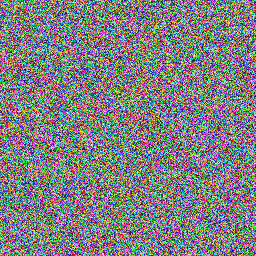

In [ ]:
from PIL import Image, ImageDraw
import io
import IPython
import gmpy2
from gmpy2 import mpz

def convert_base(src_digits, src_base, dest_base):
    x = mpz(0)
    for v in src_digits:
        x = x * src_base + v
    dest_digits = []
    while x > 0:
        x, r = x // dest_base, x % dest_base
        dest_digits.append(int(r))
    dest_digits.reverse()
    return dest_digits

def to_basen(d, n):
    # dはbytes型
    x = mpz(d.hex(), base=16)
    digits = []
    while x > 0:
        x, r = x // n, x % n
        digits.append(int(r))
    digits.reverse()
    return digits

def from_basen(d, n):
    # dはリスト
    pass


img = Image.open('/content/drive/MyDrive/Colab Notebooks/isohiyodori.jpg')

rawdata = list(np.ravel(np.array(img, dtype='uint8')))
digits = convert_base(rawdata, 256, n)


encrypted_message = [encrypt(v, (n, e)) for v in digits]
s = bytes(convert_base(encrypted_message, n, 256))

img2 = Image.frombytes("RGB", img.size, s)
buf2 = io.BytesIO()
img2.save(buf2, "BMP")

IPython.display.Image(buf2.getvalue())

[1, 13379, 14064, 1405, 1494, 10725, 1361, 20027, 8737, 20513]


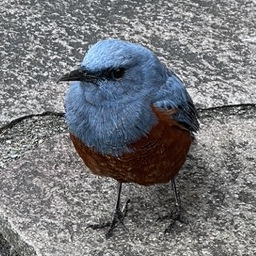

In [ ]:
encrypted_message = list(np.ravel(np.array(img2, dtype='uint8')))
digits2 = convert_base(encrypted_message, 256, n)
print(digits2[0:10])
decrypted_message = [decrypt(v, (n, d)) for v in digits2]
s = bytes(convert_base(decrypted_message, n, 256))

img3 = Image.frombytes("RGB", img.size, s)
buf2 = io.BytesIO()
img3.save(buf2, "BMP")
data4 = buf2.getvalue()

IPython.display.Image(data4)